In [1]:
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
from urllib.request import urlopen
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import numpy as np
from pylab import *
import os
from typing import Tuple
import sys
from keras.models import Model
from keras.regularizers import l2
from keras.layers import *
from keras.engine import Layer
from keras.applications.vgg16 import *
from keras.models import *
import keras.backend as K
import tensorflow as tf

Using TensorFlow backend.


## Read annotations and get mask images

In [2]:
columns = ['Labeled Data', 'Label', 'External ID', 'View Label']
df = pd.read_csv('/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/annotations.csv', skipinitialspace=True, usecols=columns)

annotations_data = {}
for index, row in df.iterrows():
    annotations_data[row['External ID']] = row['Label']

images_dir = '/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down'
mask_save_dir = Path(f'{images_dir}/annotations')
mask_save_dir.mkdir(exist_ok=True, parents=True)

for image_name, label in annotations_data.items():
    label = eval(label)
    res = not bool(label)
    if res:
        print(f'Image: {image_name} is missing annotation')
        continue
    print('Image_name:', image_name)

    mask_url = label['objects'][0]['instanceURI']
    mask_image = urlopen(mask_url)
    plt.imsave(f'{mask_save_dir}/{image_name[:-4]}.png',plt.imread(mask_image))

Image_name: Frame00025_print.jpg
Image_name: Frame00130_print.jpg
Image_name: Frame00035_print.jpg
Image_name: Frame00133_print_00.jpg
Image_name: Frame00040_print.jpg
Image_name: Frame00147_print.jpg
Image_name: Frame00047_print.jpg
Image_name: Frame00152_print_00.jpg
Image_name: Frame00000_print.jpg
Image_name: Frame00057_print.jpg
Image_name: Frame00156_print.jpg
Image_name: Frame00004_print.jpg
Image_name: Frame00072_print.jpg
Image_name: Frame00007_print.jpg
Image_name: Frame00079_print.jpg
Image_name: Frame00010_print.jpg
Image_name: Frame00094_print.jpg
Image_name: Frame00013_print.jpg
Image_name: Frame00098_print.jpg
Image_name: Frame00018_print.jpg
Image_name: Frame00106_print.jpg
Image_name: Frame00021_print.jpg
Image_name: Frame00120_print.jpg
Image_name: Frame00028_print.jpg
Image_name: Frame00132_print.jpg
Image_name: Frame00037_print.jpg
Image_name: Frame00145_print.jpg
Image_name: Frame00041_print.jpg
Image_name: Frame00147_print_00.jpg
Image_name: Frame00049_print.jpg
I

## Convert transparent PNG to binary image

In [4]:
def read_transparent_png(filename):
    image_4channel = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    alpha_channel = image_4channel[:,:,3]
    rgb_channels = image_4channel[:,:,:3]

    # black Background Image
    black_background_image = np.zeros_like(rgb_channels, dtype=np.uint8) * 255

    # Alpha factor
    alpha_factor = alpha_channel[:,:,np.newaxis].astype(np.float32) / 255.0
    alpha_factor = np.concatenate((alpha_factor,alpha_factor,alpha_factor), axis=2)

    # Transparent Image Rendered on White Background
    base = rgb_channels.astype(np.float32) * alpha_factor
    white = black_background_image.astype(np.float32) * (1 - alpha_factor)
    final_image = base + white
    return final_image.astype(np.uint8)

In [5]:
images_dir = Path('/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/annotations')
mask_save_dir = Path(f'{images_dir}/binary')
mask_save_dir.mkdir(exist_ok=True, parents=True)
image_paths = images_dir.glob('*.png')
for image_path in list(image_paths):
    image_name = f'{image_path.stem}.png'
    print(image_name)
    image = read_transparent_png(str(image_path))
    cv2.imwrite(f'{mask_save_dir}/{image_name}', image)

Frame00154_print.png
Frame00041_print.png
Frame00066_print.png
Frame00005_print.png
Frame00098_print_00.png
Frame00094_print.png
Frame00058_print.png
Frame00010_print.png
Frame00042_print.png
Frame00000_print.png
Frame00029_print.png
Frame00120_print.png
Frame00021_print.png
Frame00020_print.png
Frame00132_print.png
Frame00006_print.png
Frame00146_print.png
Frame00089_print.png
Frame00079_print.png
Frame00011_print.png
Frame00018_print.png
Frame00152_print.png
Frame00019_print.png
Frame00121_print.png
Frame00050_print.png
Frame00001_print.png
Frame00106_print.png
Frame00094_print_01.png
Frame00154_print_00.png
Frame00024_print.png
Frame00133_print_00.png
Frame00009_print_0.png
Frame00009_print.png
Frame00002_print.png
Frame00047_print.png
Frame00015_print.png
Frame00025_print.png
Frame00108_print.png
Frame00035_print.png
Frame00077_print.png
Frame00156_print.png
Frame00007_print.png
Frame00057_print.png
Frame00098_print.png
Frame00037_print.png
Frame00038_print.png
Frame00094_print_0.p

## masking/annotation image

In [ ]:
images_dir = 'images_nearmap'
mask_dir = Path(f'{images_dir}/annotations')

mask = cv2.imread(f'{mask_dir}/10.png').astype('uint8')


mask_array = np.array(mask).astype('uint8')
mask_array[mask_array == 255 ] = 1

ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1



In [ ]:
images_dir = Path('images_nearmap/annotations')
mask_save_dir = Path(f'{images_dir}/binary')
image_paths = images_dir.glob('*.png')
for image_path in list(image_paths):
    image_name = f'{image_path.stem}.png'
    print(image_name)
    
    mask = cv2.imread(str(image_path))
    height = mask.shape[0]
    width = mask.shape[1]
    ann_img = np.zeros((height,width,3)).astype('uint8')
    ann_img[ mask == 255] = 1
#     mask_array = np.array(mask).astype('uint8')
#     mask_array[mask_array == 255 ] = 1
#     plt.imshow(ann_img)
#     plt.show()
    cv2.imwrite( f'{mask_save_dir}/{image_name}' ,ann_img )
#     break
    

In [ ]:
np.array(ann_img).max()

## Convert JPGs to PNGs

In [9]:
images_dir = Path('/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down')
image_paths = images_dir.glob('*.jpg')
for image_path in list(image_paths):
    image_name = f'{image_path.stem}.png'
    print(image_path)
    im = Image.open(f'{image_path}')
    rgb_im =  im.convert('RGB')
    rgb_im.save(f'{images_dir}/{image_name}')
    # Remove JPGs
    os.remove(image_path)

/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00013_print.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00057_print.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00154_print_00.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00049_print.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00089_print.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00077_print.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00018_print.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00009_print.jpg
/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/images_top-down/Frame00152_print_00.jpg
/home/azhar/I

## Rename files in a folder

In [3]:
import os
i = 0
data_dir =  "/home/azhar/unet/data/membrane/test"    
for filename in os.listdir(data_dir): 
    print(filename)
    dst = str(i) + ".png"
    src = f'{data_dir}/{filename}'
    print(src)
    dst =f'{data_dir}/{dst}'
    print(dst)
    os.rename(src, dst) 
    i += 1

img18.png
/home/azhar/unet/data/membrane/test/img18.png
/home/azhar/unet/data/membrane/test/0.png
img17.png
/home/azhar/unet/data/membrane/test/img17.png
/home/azhar/unet/data/membrane/test/1.png
img19.png
/home/azhar/unet/data/membrane/test/img19.png
/home/azhar/unet/data/membrane/test/2.png
img8.png
/home/azhar/unet/data/membrane/test/img8.png
/home/azhar/unet/data/membrane/test/3.png
img12.png
/home/azhar/unet/data/membrane/test/img12.png
/home/azhar/unet/data/membrane/test/4.png
img15.png
/home/azhar/unet/data/membrane/test/img15.png
/home/azhar/unet/data/membrane/test/5.png
img33.png
/home/azhar/unet/data/membrane/test/img33.png
/home/azhar/unet/data/membrane/test/6.png
img35.png
/home/azhar/unet/data/membrane/test/img35.png
/home/azhar/unet/data/membrane/test/7.png
img34.png
/home/azhar/unet/data/membrane/test/img34.png
/home/azhar/unet/data/membrane/test/8.png
img4.png
/home/azhar/unet/data/membrane/test/img4.png
/home/azhar/unet/data/membrane/test/9.png
img9.png
/home/azhar/une

## Model training

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
DATA_DIR = './data/CamVid/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

Loading data...
Done!


In [4]:
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

### Dataloader and utility functions

In [8]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

In [6]:
# classes for data loading and preprocessing
class Dataset:
    """CamVid Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    CLASSES = ['sky', 'building', 'pole', 'road', 'pavement', 
               'tree', 'signsymbol', 'fence', 'car', 
               'pedestrian', 'bicyclist', 'unlabelled']
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)
        
        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # add background if mask is not binary
        if mask.shape[-1] != 1:
            background = 1 - mask.sum(axis=-1, keepdims=True)
            mask = np.concatenate((mask, background), axis=-1)
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)
    
    
class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

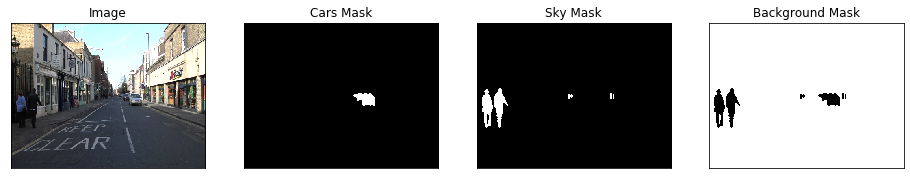

In [10]:

# Lets look at data we have
dataset = Dataset(x_train_dir, y_train_dir, classes=['car', 'pedestrian'])

image, mask = dataset[6] # get some sample
visualize(
    image=image, 
    cars_mask=mask[..., 0].squeeze(),
    sky_mask=mask[..., 1].squeeze(),
    background_mask=mask[..., 2].squeeze(),
)

In [12]:
import albumentations as A

In [21]:
def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        A.HorizontalFlip(p=0.5),

        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        A.PadIfNeeded(min_height=320, min_width=320),
        A.RandomCrop(height=320, width=320),

        A.IAAAdditiveGaussianNoise(p=0.2),
        A.IAAPerspective(p=0.5),

        A.OneOf(
            [
                A.CLAHE(p=1),
                A.RandomBrightness(p=1),
                A.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        A.OneOf(
            [
                A.IAASharpen(p=1),
                A.Blur(blur_limit=3, p=1),
                A.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        A.OneOf(
            [
                A.RandomContrast(p=1),
                A.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
        A.Lambda(mask=round_clip_0_1)
    ]
    return A.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        A.PadIfNeeded(384, 480)
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [22]:
dataset = Dataset(x_train_dir, y_train_dir, classes=['car'], augmentation=get_training_augmentation())

image, mask = dataset[12] # get some sample
visualize(
    image=image, 
    cars_mask=mask[..., 0].squeeze(),
    sky_mask=mask[..., 1].squeeze(),
    background_mask=mask[..., 2].squeeze(),
)

AttributeError: module 'albumentations' has no attribute 'Lambda'

## random

In [5]:
def overlay_mask_on_rgb_image(rgb_img: np.ndarray, bin_img: np.ndarray, color: Tuple[int] = (0, 255, 0)) \
        -> np.ndarray:
    if (len(rgb_img.shape) != 3) and (len(bin_img.shape) != 2):
        raise ValueError(f'Image dimensions are incorrect.')
    rgb_img[bin_img >= 0.5] = color
    return rgb_img.astype('uint8')

In [6]:
from random import randint
images_dir = Path('/home/azhar/INTAQ/ImageAnalytics/CurbDetection/Segmentation/seg/dataset/rendered')
# masks_dir = Path('/home/azhar/Tutorials/seg/dataset2/val_masks')
image_paths = images_dir.glob('*.jpg')
for image_path in list(image_paths):
    image_name = f'{image_path.name}'
    if 'Frame' in image_name:
        print(image_name)
#         mask_path = f'{masks_dir}/{image_name}'
        image = cv2.imread(str(image_path))
#         mask = cv2.imread(mask_path,0)
        
#         overlay_img = overlay_mask_on_rgb_image(rgb_img=image, bin_img=mask)
#         plt.figure()
#         plt.imshow(overlay_img)
#         plt.axis('o')
#         plt.show()
        
        dim_1 = randint(300, 350)
        dim_2 = randint(300, 350)
        resize_dim = (dim_1, dim_2)
        resized_image = cv2.resize(image, resize_dim)
#         resized_mask = cv2.resize(mask, resize_dim)
        
        print(f'resized__shape: {resized_image.shape}')
        cv2.imwrite(str(image_path), resized_image)

Frame00457.jpg
resized__shape: (314, 315, 3)
Frame00547_print.jpg
resized__shape: (344, 306, 3)
Frame00462_thumb.jpg
resized__shape: (315, 321, 3)
Frame00255_thumb.jpg
resized__shape: (334, 336, 3)
Frame00533_print.jpg
resized__shape: (317, 301, 3)
Frame00144_thumb.jpg
resized__shape: (343, 335, 3)
Frame00418_print.jpg
resized__shape: (327, 330, 3)
Frame00056_thumb.jpg
resized__shape: (343, 311, 3)
Frame00520_print.jpg
resized__shape: (331, 300, 3)
Frame00237_print.jpg
resized__shape: (305, 340, 3)
Frame00291_thumb.jpg
resized__shape: (316, 302, 3)
Frame00517_print.jpg
resized__shape: (321, 303, 3)
Frame00269_thumb.jpg
resized__shape: (328, 346, 3)
Frame00216.jpg
resized__shape: (337, 343, 3)
Frame00323_thumb.jpg
resized__shape: (322, 332, 3)
Frame00093_print.jpg
resized__shape: (347, 318, 3)
Frame00367_thumb.jpg
resized__shape: (335, 330, 3)
Frame00468_thumb.jpg
resized__shape: (319, 331, 3)
Frame00354_thumb.jpg
resized__shape: (317, 314, 3)
Frame00292_thumb.jpg
resized__shape: (326, 

resized__shape: (345, 334, 3)
Frame00194_print.jpg
resized__shape: (317, 315, 3)
Frame00153.jpg
resized__shape: (310, 350, 3)
Frame00319_print.jpg
resized__shape: (314, 322, 3)
Frame00181_print.jpg
resized__shape: (327, 307, 3)
Frame00097_thumb.jpg
resized__shape: (318, 339, 3)
Frame00058_thumb.jpg
resized__shape: (307, 337, 3)
Frame00151.jpg
resized__shape: (338, 305, 3)
Frame00506_print.jpg
resized__shape: (349, 306, 3)
Frame00521_thumb.jpg
resized__shape: (339, 331, 3)
Frame00509_thumb.jpg
resized__shape: (342, 346, 3)
Frame00326.jpg
resized__shape: (313, 342, 3)
Frame00368.jpg
resized__shape: (301, 307, 3)
Frame00391_print.jpg
resized__shape: (336, 345, 3)
Frame00069_thumb.jpg
resized__shape: (313, 309, 3)
Frame00164_print.jpg
resized__shape: (334, 306, 3)
Frame00064_thumb.jpg
resized__shape: (304, 341, 3)
Frame00408.jpg
resized__shape: (333, 329, 3)
Frame00442_print.jpg
resized__shape: (315, 337, 3)
Frame00227.jpg
resized__shape: (328, 311, 3)
Frame00356.jpg
resized__shape: (326, 

resized__shape: (311, 326, 3)
Frame00061_thumb.jpg
resized__shape: (347, 303, 3)
Frame00517_thumb.jpg
resized__shape: (323, 340, 3)
Frame00317.jpg
resized__shape: (300, 310, 3)
Frame00183.jpg
resized__shape: (317, 318, 3)
Frame00085_print.jpg
resized__shape: (328, 301, 3)
Frame00147_thumb.jpg
resized__shape: (328, 339, 3)
Frame00397_thumb.jpg
resized__shape: (312, 322, 3)
Frame00470.jpg
resized__shape: (306, 329, 3)
Frame00197_thumb.jpg
resized__shape: (329, 340, 3)
Frame00063_thumb.jpg
resized__shape: (329, 337, 3)
Frame00505_print.jpg
resized__shape: (323, 338, 3)
Frame00471_print.jpg
resized__shape: (342, 333, 3)
Frame00544_thumb.jpg
resized__shape: (308, 346, 3)
Frame00544_print.jpg
resized__shape: (312, 320, 3)
Frame00479_print.jpg
resized__shape: (328, 339, 3)
Frame00529.jpg
resized__shape: (305, 301, 3)
Frame00186.jpg
resized__shape: (317, 332, 3)
Frame00366.jpg
resized__shape: (309, 315, 3)
Frame00294_thumb.jpg
resized__shape: (302, 303, 3)
Frame00507.jpg
resized__shape: (323, 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [4]:

print(dim)

(342, 312)
